<a href="https://colab.research.google.com/github/mrosedata/FTW_/blob/main/Model_Evaluation_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The metrics that you choose to evaluate your machine learning algorithms are very important.
Choice of metrics influences how the performance of machine learning algorithms is measured and compared.

# Date preprocessing

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.Age =titanic.Age.fillna(titanic.Age.median())

In [ ]:
 titanic.drop(['Sex','Embarked','Ticket', 'PassengerId', 'Name','Cabin'],axis=1,inplace=True)

In [ ]:
titanic = titanic[['Age','Fare','Survived']]

# Convert 'Sex' column to dummy variables
# titanic_data = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

#####  train test split 70% train 30% for test

<img src="https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png" style="width:50%;">

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

# Metrics for evaluating Classifiers

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

### Accuracy

This metric measures the ratio of correct predictions over the total number of predictions.


In [ ]:
print(accuracy_score(y_test,predictions))

0.6517857142857143


While its simplicity is appealing, the most significant reason why accuracy is not a good measure for imbalanced data is that it doesn't consider the nuances of classification. Measured in a vacuum, it simply provides a limited view of the model's true dependability.

In [ ]:
titanic.Survived.value_counts()

Survived
0    550
1    345
Name: count, dtype: int64

### Confusion matrix <a class="anchor" id="cm"></a>

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

<img src="https://i.ytimg.com/vi/AOIkPnKu0YA/maxresdefault.jpg" />

In [ ]:
cm = confusion_matrix(y_test,predictions)
print(cm)

[[124  11]
 [ 67  22]]


In [ ]:
TP = cm[0][0] # The model predicted true and it is true.
FP = cm[0][1] # The model predicted True and it is false.
FN = cm[1][0] # The model predicted false and it is true.
TN = cm[1][1] # The model predicted false and it is false.

### Precision

Precision is a way for us to measure how many predictions did our model correctly predict out of all the predictions made.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*MV1tjJLTc68slUy3GL2ftQ.png" />

In [ ]:
sklearn.metrics.precision_score(y_test, predictions)

0.6666666666666666

### Recall

Recall, on the other hand, is a way for us to measure how many records (or datapoints, or rows) did we correctly predict out of all records we have.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*LOEPzJuZqnnFYUI2HfRbwg.png" />

In [ ]:
sklearn.metrics.recall_score(y_test, predictions)

0.24719101123595505

### Precision vs Recall

Actually Precision and Recall only differs on the False Positive and the False Negative.

Suppose we want to predict people who will Survive:
False Positive is the number of people who “Survived” that are not actually a survivor.
False Negative is the number of people who “Survived” we fail to predict as a survivor.
So, False Positive and False Negative is, in a way, “the number of predictions that are wrong”.

### Sensitivity vs Specificity

Remember that there are 2 classes that we want to predict. The survivor and non-survivor. Sensitivity and Specificity is actually a way to measure model performance **when we have only 2 classes to predict** (Binary Classification).

### Sensitivity (or Recall or True Positive Rate)

Sensitivity talks about the number of positive records correctly predicted.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*oGisKlXnsa8HdjqsQJJ0mw.png" />

### Specificity (or True Negative Rate)

Specificity talks ambout the number of negative records correctly predicted.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*zkGNlhKPOpWkeJcACbbEhA.png" />

In [ ]:
sklearn.metrics.recall_score(y_test, predictions, pos_label =0)

0.9185185185185185

### F1 score

F1 score is an alternative machine learning evaluation metric that assesses the predictive skill of a model by elaborating on its class-wise performance rather than an overall performance as done by accuracy. F1 score combines two competing metrics- precision and recall scores of a model, leading to its widespread use in recent literature.

The F1 score is calculated as the harmonic mean of the precision and recall scores, as shown below. It ranges from 0-100%, and a higher F1 score denotes a better quality classifier.

<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d2a22f93657640ef19f_f1-score-eqn.webp" />

In [ ]:
sklearn.metrics.f1_score(y_test, predictions)

0.360655737704918

### ROC-AUC

ROC (Receiver Operating Characteristic) curve is a visualization of false positive rate (x-axis) and the true positive rate (y-axis).

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

<img src="https://i0.wp.com/sefiks.com/wp-content/uploads/2020/12/roc-curve-original.png?fit=726%2C576&ssl=1" />

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.01481481 0.01481481 0.02962963 0.02962963
 0.03703704 0.03703704 0.04444444 0.04444444 0.05925926 0.05925926
 0.06666667 0.06666667 0.07407407 0.07407407 0.0962963  0.0962963
 0.0962963  0.11111111 0.11111111 0.11111111 0.11111111 0.12592593
 0.12592593 0.13333333 0.13333333 0.14074074 0.14074074 0.14814815
 0.14814815 0.16296296 0.17037037 0.17777778 0.2        0.2
 0.20740741 0.20740741 0.22222222 0.22222222 0.23703704 0.23703704
 0.24444444 0.24444444 0.25925926 0.25925926 0.27407407 0.28888889
 0.2962963  0.2962963  0.3037037  0.3037037  0.31111111 0.32592593
 0.34814815 0.34814815 0.36296296 0.36296296 0.37777778 0.37777778
 0.38518519 0.38518519 0.39259259 0.4        0.42962963 0.44444444
 0.48888889 0.4962963  0.51111111 0.51111111 0.51851852 0.51851852
 0.55555556 0.57037037 0.57777778 0.59259259 0.6        0.6
 0.60740741 0.60740741 0.62962963 0.62962963 0.65925926 0.66666667
 0.7037037  0.7037037  0.73333333 0.73333333 0.76296296 0.77777778
 0.8      

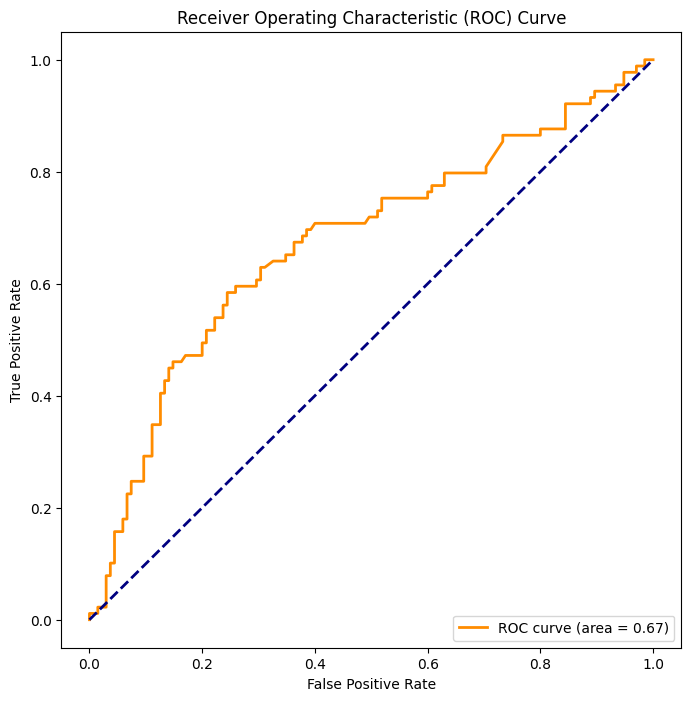

In [ ]:
# Plot ROC curve
import matplotlib.pyplot as plt

roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ROC AUC reflects the model quality in one number. This sums up the performance across the different classification thresholds. It is a valuable "overall" quality measure, whereas precision and recall provide a quality "snapshot" at a given decision threshold.


### Classification Report
This is a summary of metrics for each class.

In [ ]:
print('classification report:')
print(classification_report(y_test, predictions))

classification report:
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       135
           1       0.67      0.25      0.36        89

    accuracy                           0.65       224
   macro avg       0.66      0.58      0.56       224
weighted avg       0.66      0.65      0.60       224



# Metrics for evaluating Regressors

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
boston = pd.read_csv("boston_house_prices.csv", header=1)
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per USD10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in USD1000's

In [ ]:
# Select features and target variable
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### R-squared

Linear regression identifies the equation that produces the smallest difference between all the observed values and their fitted values. To be precise, linear regression finds the smallest sum of squared residuals that is possible for the dataset.

<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/residuals.png?resize=300%2C186&ssl=1" />

R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/r_squared.png?resize=283%2C48&ssl=1" />

* Note that variance refers to a statistical measurement of the spread between numbers in a data set. *

To visually demonstrate how R-squared values represent the scatter around the regression line, you can plot the fitted values by observed values.

<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/flp_highvar.png?resize=300%2C210&ssl=1" />

The R-squared for the regression model on the above is 15% while for the one below, it is 85%.

<img src="https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/flp_lowvar.png?resize=300%2C209&ssl=1" />

When a regression model accounts for more of the variance, the data points are closer to the regression line. In practice, you’ll never see a regression model with an R2 of 100%.

In [ ]:
# Calculate R^2
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R^2
n = len(y_test)
p = X.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the results
print(f'R^2: {r2:.4f}')
print(f'Adjusted R^2: {adjusted_r2:.4f}')

R^2: 0.6688
Adjusted R^2: 0.6198


# How to improve models:
1. Try using more variables in the predictions
2. Try iterating on the test:train probabilities
3. Do categorical feature encoding. This supports point 1.


# References
1. https://medium.com/analytics-vidhya/precision-recall-sensitivity-specificity-very-brief-explanation-747d698264ca
2. https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
3. https://www.v7labs.com/blog/f1-score-guide
4. https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b